# Simulated Annealing

Certain functions cannot be optimized through systematic deterministic approaches like gradient descent.  In particular, there are whole classes of optimization problems that are fundamentally hard to solve (so called NP-hard problems).  For these, there are no known algorithms that guarantee optimum solutions.

Therefore, we need to look for other techniques, usually *stochastic* or probabilistic techniques.  One among these is Simulated Annealing.

The name comes from the concept of Annealing in Metallurgy: by heating metal and then cooling it down while hammering it, you can get it to a more compact and strong state.  So the optimization technique here also brings in a concept of Temperature and uses that to guide the search for a solution.

## Function and Optimization types

While you can use SA on any arbitrary function, it makes sense to use it when regular techniques are not going to work.  An example of this is functions with multiple optima.  Here, we will also assume that we are interested in minimization of a function.

In [5]:
# Set up imports
# %matplotlib ipympl
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

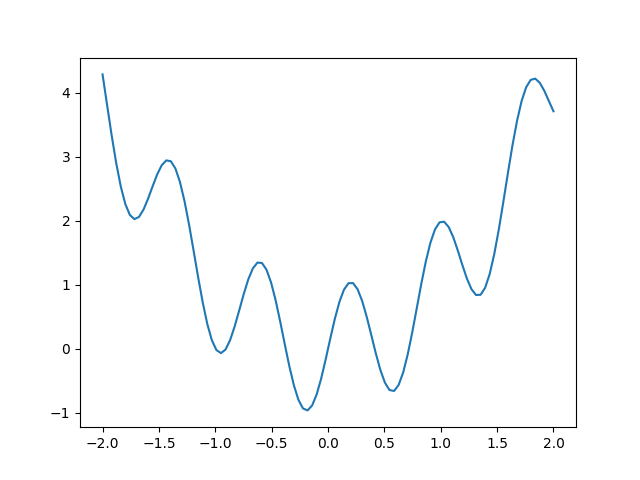

In [6]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)

xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)
plt.plot(xbase, ybase)
plt.show()

## Gradient descent?

We can try the known technique of gradient descent here.  It works -- but does not really find the global optimum.  It just goes to whichever is the nearest minimum, which could be quite far from the global optimum depending on your choice of starting point

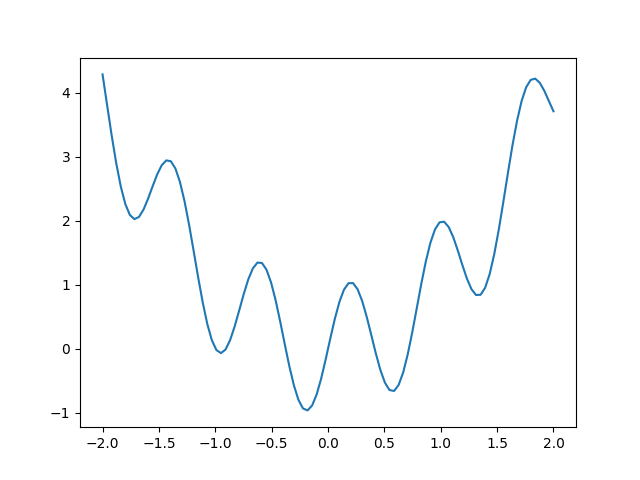

In [3]:
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 1.1
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.01

def yprimefunc(x):
    return 2 * x + 8 * np.cos(8*x)

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - yprimefunc(bestx) * lr 
    bestx = x
    y = yfunc(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()

## Annealing

The alternative is to use a random search approach.  However, as we already saw with simpler functions, random search can take you all over the place and take a long time to find the minimum.  Instead, it makes sense to initially search over a wide range, but as time goes on, reduce the range of values over which you are going to search.

The first thing here is to introduce the concept of a *Move*.  This is a change from the present position to some neighbouring position, where we hope the solution is better than it is here.  Initially we would like to take large steps and move around to explore, but as time goes on and we are near an optimum, we want to take smaller steps.

We do this by introducing a notion of *Temperature*.  Initially the temperature is high, and the step size is also high.  More importantly, even if the new cost becomes *worse* than the current cost, we are still willing to accept the move with a probability given by

$$P(\Delta E) = e^{-\frac{\Delta E}{kT}}$$

Here $\Delta E$ is the cost increase as a result of the new move, and $k$ is a constant (conceptually similar to Boltzmann's constant in statistical mechanics, which is where these ideas are inspired from).  $T$ is the present temperature.  Clearly, as $T$ decreases, the probability calculated above will tend towards $e^{-\infty} = 0$.

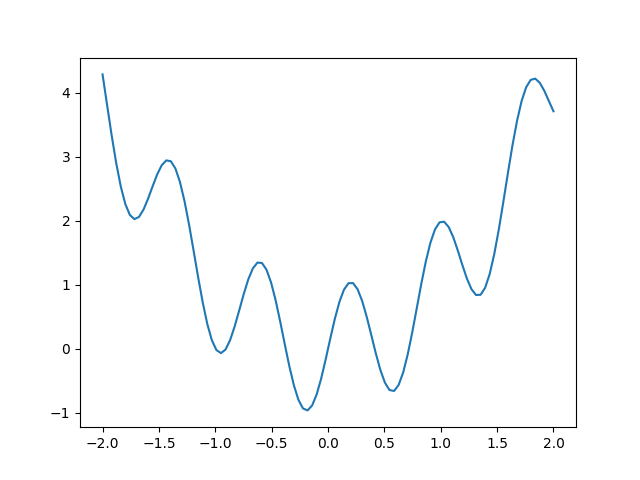

In [9]:
# Initial temperature
T = 3.0
decayrate = 0.95
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = -2
rangemin, rangemax = -2, 2 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
def onestep(frame):
    global bestcost, bestx, decayrate, T
    # Generate a random value \in -2, +2
    dx = (np.random.random_sample() - 0.5) * T
    x = bestx + dx
    # print(f"Old x = {x}, delta = {dx}")
    y = yfunc(x)
    if y < bestcost:
        # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
        bestcost = y
        bestx = x
        lngood.set_data(x, y)
    else:
        toss = np.random.random_sample()
        if toss < np.exp(-(y-bestcost)/T):
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        # print(f"New cost {y} worse than best so far: {bestcost}")
        pass
    T = T * decayrate
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
plt.show()

# Assignment

## Part 1 - Simple

Write a function that takes as input the following:

- another function (note that in Python you can pass functions as arguments to other functions)
- starting point
- temperature 
- learning/decay rate

and then proceeds to apply Simulated Annealing to minimize the function.  This is more or less the same as what has been given above, but you need to encapsulate it all into a simple function and demonstrate how it works on arbitrary functions.  

## Part 2 

Note that part 2 is also part of the regular assignment.  It is **not** optional, but is specified as a separate problem part to break the overall problem into portions in case you find this too hard to solve at one shot.  

The traveling salesman problem gives you a set of city locations (x, y coordinates).  Your goal is to find a route from a given starting point that visits all the cities exactly once and then returns to the origin, with the minimum total distance covered (distance is measured as Euclidean distance $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$).  

You will be given a file where the first line is the number of cities *N*, and the next *N* lines give the cities as a list of x, y coordinates: for example
```
4
0.0 1.5
2.3 6.1
4.2 1.3
2.1 4.5
```

Your goal is to give a sequence of numbers, for example `[0 3 2 1]` which specifies the order in which to visit the cities.  Note that after the last city you will come back to the first one in the list.  

Plot the cities with the path you have specified, and output the total length of the shortest path discovered so far.

## Report

You need to submit a .zip file that contains all your code (either notebook or plain Python files) and a PDF file (can be generated from the notebook) that clearly documents what you have implemented and how to run your code.  For part 1, you need to also show the output plot that shows how the search proceeded when run on the function given in the presentation.

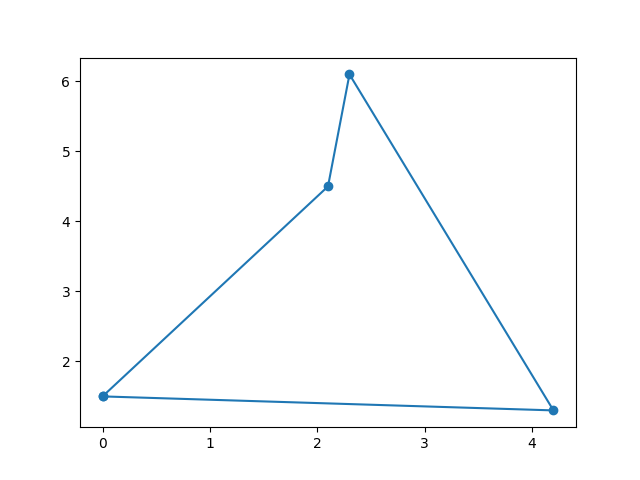

In [3]:
# Example Python input and plot
x_cities = np.array([0.0, 2.3, 4.2, 2.1])
y_cities = np.array([1.5, 6.1, 1.3, 4.5])
finalorder = [0, 3, 1, 2]

# Rearrange for plotting
xplot = x_cities[finalorder] 
yplot = y_cities[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()